In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

: 

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Housing - Housing.csv')
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
data.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
data.shape

(545, 13)

<Axes: xlabel='mainroad'>

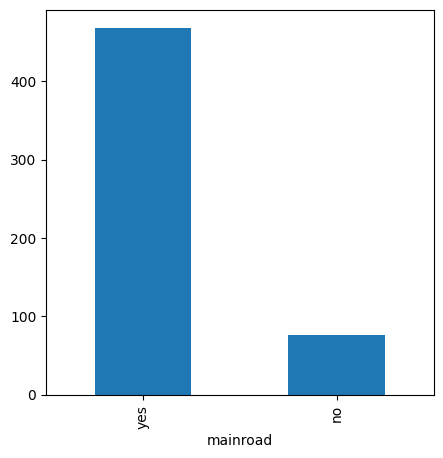

In [ ]:
az=data['mainroad'].value_counts()
plt.rcParams['figure.figsize']=(5,5)
az.plot(kind='bar')

In [ ]:
data['mainroad']=data['mainroad'].replace(['yes','no'],[1,0])
data['guestroom']=data['guestroom'].replace(['yes','no'],[1,0])
data['basement']=data['basement'].replace(['yes','no'],[1,0])
data['hotwaterheating']=data['hotwaterheating'].replace(['yes','no'],[1,0])
data['airconditioning']=data['airconditioning'].replace(['yes','no'],[1,0])
data['prefarea']=data['prefarea'].replace(['yes','no'],[1,0])
data['furnishingstatus']=data['furnishingstatus'].replace(['furnished','semi-furnished','unfurnished'],[2,1,0])

In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [ ]:
y=data['price']
x=data.drop('price',axis=1)

In [ ]:
y.head()

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000


In [ ]:
x.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,2
1,8960,4,4,4,1,0,0,0,1,3,0,2
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,2
4,7420,4,1,2,1,1,1,0,1,2,0,2


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,t_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=linear.predict(x_test)

In [ ]:
from sklearn import metrics
print("R square=",metrics.r2_score(y_test,y_pred))

R square= 0.6578047592637595
